In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
class Neural_Network(object):
    def __init__(self):
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
    
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
        
    def forward(self, X):
        self.z1 = np.dot(X,self.W1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1,self.W2)
        self.yHat = self.sigmoid(self.z2)
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return np.exp(z)/((1+np.exp(z))**2)
    
    def cost(self, X, y):
        self.yHat = self.forward(X)
        e = 0.5*sum((y-self.yHat)**2)
        return e
    
    def costPrime(self, X, y):
        self.yHat = self.forward(X)
        
        #output 은 1개 인데 연산을 위해 그전 레이어의 유닛갯수만큼 복사한다.
        delta2 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z2))
        # .T 는 대각선기준으로 반전
        dJdW2 = np.dot(self.a1.T, delta2)
        
        delta1 = np.dot(delta2, self.W2.T)*self.sigmoidPrime(self.z1)
        dJdW1 = np.dot(X.T, delta1)
        
        return dJdW1, dJdW2

In [93]:
# set
X = np.array(([3,5],[5,1],[10,2]), dtype=float)
y = np.array(([75],[82],[93]), dtype=float)

In [94]:
# scaling
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [100]:
NN = Neural_Network()
cost1 = NN.cost(X,y)
dJdW1, dJdW2 = NN.costPrime(X,y)
print(dJdW1)
print(dJdW2)

scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.cost(X,y)
print(cost1, cost2)

dJdW1, dJdW2 = NN.costPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.cost(X, y)
print(cost2, cost3)

[[ 0.03887065  0.03275704 -0.03294603]
 [ 0.02887116  0.02428534 -0.02144234]]
[[-0.09624824]
 [-0.09380573]
 [-0.10685984]]
[ 0.09860682] [ 0.09860682]
[ 0.09860682] [ 0.09860682]


In [ ]:
# test ===================================

0.037356041669227125


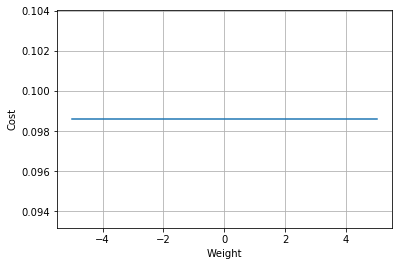

In [75]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()
timeElapsed = endTime-startTime
print(timeElapsed)

plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')
plt.show()

In [76]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()
timeElapsed = endTime-startTime
print(timeElapsed)

27.50318320986935


In [10]:
#           w size
0.04*(1000**(9-1))/(3600*24*365)

1268391679350583.5

In [66]:
NN = Neural_Network()
yhat = NN.forward(X)
NN.W1[0,0] = 1.1
print(sum(0.5*(y-yhat)**2))

[ 0.63729631]


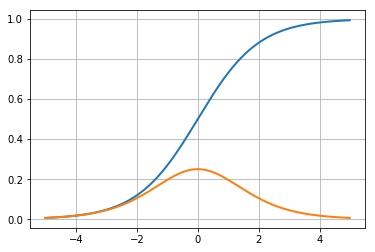

In [77]:
# sigmoid 미분 함수
def sigmoidPrime(z):
    return np.exp(z)/((1+np.exp(z))**2)
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.show()